<a href="https://colab.research.google.com/github/adrianans/Rock-Paper-Scissor-Classifier/blob/main/DICODING_Anisa_Adriana_Putri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DICODING Klasifikasi Gambar Pada Dataset Rockpaperscissors**












**IMPORT TENSORFLOW**

In [ ]:
import tensorflow as tf

**IMPORT DATASET**

> Import dataset rockpaperscissors.zip from dicodingacademy using wget



In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-06-27 12:47:10--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  9.25MB/s    in 46s     

2021-06-27 12:47:57 (6.74 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



**UNZIP DATASET**




In [ ]:
import zipfile
import os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

**CREATING DIRECTORY**

In [ ]:
base_dir = '/tmp/rockpaperscissors/rps-cv-images/'

**DATA PREPROCESSING**


Augmentasi Gambar

ImageDataGenerator

Splitting training 60%, validation 40%






In [ ]:
# ImageDataGenerator: mempersiapkan train and testing data
# prepocessing, pelabelan sampel otomatis, augmentasi gambar

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='wrap',
    validation_split=.4 #split train 0.6 val 0.4
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='wrap',
    validation_split=.4 #split train 0.6 val 0.4
)

In [ ]:
# mempersiapkan data latih yang akan dipelajari model

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150,150), 
    batch_size=4,
    class_mode = 'sparse'
    subset = 'training' # subset training 0.6
)

validation_generator = test_datagen.flow_from_directory(
    base_dir, 
    target_size=(150,150),
    batch_size=4,
    class_mode = 'sparse' ,
    subset = 'validation' # subset val 0.4
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
# membangun arsitektur CNN
# layer konvolusi: mengekstraksi atribut gambar
# layer max pooling: mereduksi resolusi gambar

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

**COMPILE MODEL**

In [ ]:
# Compile model dengan 'Adamax' optimizer
# dan loss function 'sparse_categorical_crossentropy'

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.optimizers.Adamax(),
              metrics=['accuracy'])

**CALLBACKS**

In [ ]:
# minimal accuracy 98%
accuracy_threshold = 0.98

# penggunaan callback untuk stop epoch ketika akurasi > 98%
training_finished = False
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('accuracy') > accuracy_threshold):
      print("\nReached %2.2f%% accuracy, stop training." %(accuracy_threshold*100))
      self.model.stop_training = True

callbacks = MyCallback()

**TRAINING MODEL**

In [ ]:
# latih model dengan model.fit

history = model.fit(
    train_generator,
    steps_per_epoch=40, #batch yang akan dieksekus pada setiap epoch
    epochs=20, # tambahkan eposchs jika akurasi model belum optimal
    validation_data=validation_generator, # menampulkan akurasi pengujian data validasi
    validation_steps=5, # batch yang dieksekusi pada setiap epoch
    verbose=2,
    callbacks = [callbacks]
)

Epoch 1/20
40/40 - 10s - loss: 0.1475 - accuracy: 0.9688 - val_loss: 0.0706 - val_accuracy: 0.9500
Epoch 2/20
40/40 - 10s - loss: 0.0318 - accuracy: 0.9937 - val_loss: 0.0777 - val_accuracy: 0.9500

Reached 98.00% accuracy, stop training.


**MODEL EVALUATION AND SUMMARY**

In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(train_generator, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
329/329 [==============================] - 27s 82ms/step - loss: 0.0601 - accuracy: 0.9825
test loss, test acc: [0.06006467714905739, 0.9824962019920349]


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

**PREDICTING**

In [ ]:
# melihat urutan class
print(train_generator.class_indices)

{'paper': 0, 'rock': 1, 'scissors': 2}


Saving images-3.jpeg to images-3 (9).jpeg
images-3.jpeg
paper


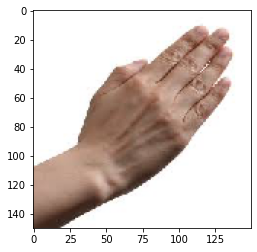

In [ ]:
# melihat hasil dari model yang dibuat

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

# predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  output_class = np.argmax(classes)
  if output_class == 0:
     print("paper")
  elif output_class == 1:
     print("rock")
  elif output_class == 2:
     print("scissors")
  else :
     print("not classified")